In [1]:
import sys
import glob
from scipy.optimize import differential_evolution, dual_annealing, minimize
import torch
import numpy as np

from msna.msna_common import get_dataframes
from msna.our_methods.binary_classifier.msna_cnn import MSNA_CNN
from msna.our_methods.binary_classifier.msna_pipeline import MSNA_pipeline

/Users/trippdow/Projects/HealthIntelligence/msna/msna/our_methods/binary_classifier/msna_pipeline.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.cnn.load_state_di

In [2]:
files = glob.glob("../../../Archival/MSNAS/MSNA*/MSNA*burstcomments*.txt")[:-4]

In [ ]:


def loss(x):
    augment_prob, a = x
    
    pipeline = MSNA_pipeline(
            window_size=256, verbose=True, 
            argmax_prop=0.35, dropout_prob=0.6, 
            fc_dim=32, training_imbalance=4.0,
            rectify_prop=0.5, low_freq=0.5, high_freq=35,
            augment_prob=augment_prob, a=a
    )
    
    precisions, recalls, f1s = pipeline.k_fold_cross_validation(files, 4)
    score = np.mean(f1s)
    print(score, augment_prob, a)
    return -score

x = [0.5, 1.0]
bounds = [(0.1, 0.9), (0.0, 10.0)]
result = differential_evolution(loss, x0=x, bounds=bounds)

print(result)


Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1788
Epoch [16/16], Loss: 0.1498
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14227576931379515
                   x: [ 4.120e-01]
                 nit: 2
                nfev: 47
          population: [[ 4.120e-01]
                       [ 3.680e-01]
                       ...
                       [ 4.305e-01]
                       [ 4.061e-01]]
 population_energies: [ 1.423e-01  1.442e-01 ...  1.425e-01  1.436e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8392360992968821
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2145
Epoch [16/16], Loss: 0.1765
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1504200689206647
                   x: [ 3.811e-01]
                 nit: 4
                nfev: 77
          population: [[ 3.811e-01]
                       [ 3.985e-01]
                       ...
                       [ 4.157e-01]
                       [ 4.092e-01]]
 population_energies: [ 1.504e-01  1.522e-01 ...  1.516e-01  1.515e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.7295042523241871
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1942
Epoch [16/16], Loss: 0.1710
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15201550490254254
                   x: [ 4.372e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.372e-01]
                       [ 3.790e-01]
                       ...
                       [ 4.069e-01]
                       [ 4.499e-01]]
 population_energies: [ 1.520e-01  1.545e-01 ...  1.534e-01  1.528e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8544956544278824
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1846
Epoch [16/16], Loss: 0.1485
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.12640401897917677
                   x: [ 4.827e-01]
                 nit: 2
                nfev: 47
          population: [[ 4.827e-01]
                       [ 4.967e-01]
                       ...
                       [ 4.859e-01]
                       [ 4.902e-01]]
 population_energies: [ 1.264e-01  1.273e-01 ...  1.267e-01  1.268e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7947482917507068
0.8044960744499147 0.5 1.0
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1605
Epoch [16/16], Loss: 0.1448
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1396513985327897
                   x: [ 4.324e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.324e-01]
                       [ 5.532e-01]
                       ...
                       [ 4.663e-01]
                       [ 4.132e-01]]
 population_energies: [ 1.397e-01  1.448e-01 ...  1.400e-01  1.414e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8288508975213649
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1648
Epoch [16/16], Loss: 0.1399
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15186645405263083
                   x: [ 5.815e-01]
                 nit: 4
                nfev: 77
          population: [[ 5.815e-01]
                       [ 5.540e-01]
                       ...
                       [ 6.311e-01]
                       [ 6.208e-01]]
 population_energies: [ 1.519e-01  1.521e-01 ...  1.535e-01  1.533e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.875924197204253
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1761
Epoch [16/16], Loss: 0.1525
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15746192787410682
                   x: [ 5.199e-01]
                 nit: 5
                nfev: 92
          population: [[ 5.199e-01]
                       [ 4.671e-01]
                       ...
                       [ 4.449e-01]
                       [ 4.637e-01]]
 population_energies: [ 1.575e-01  1.580e-01 ...  1.593e-01  1.580e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8437531591459466
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1753
Epoch [16/16], Loss: 0.1544
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1513000979312471
                   x: [ 1.666e-01]
                 nit: 4
                nfev: 77
          population: [[ 1.666e-01]
                       [ 1.578e-01]
                       ...
                       [ 1.509e-01]
                       [ 1.720e-01]]
 population_energies: [ 1.513e-01  1.522e-01 ...  1.518e-01  1.525e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7483235011067857
0.8242129387445876 0.3367479160520437 6.8057641668195465
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1697
Epoch [16/16], Loss: 0.1409
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15398185226133096
                   x: [ 4.416e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.416e-01]
                       [ 4.572e-01]
                       ...
                       [ 4.622e-01]
                       [ 4.538e-01]]
 population_energies: [ 1.540e-01  1.552e-01 ...  1.556e-01  1.558e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8340725142715194
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1552
Epoch [16/16], Loss: 0.1243
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.17007572663271905
                   x: [ 5.087e-01]
                 nit: 3
                nfev: 62
          population: [[ 5.087e-01]
                       [ 4.901e-01]
                       ...
                       [ 5.492e-01]
                       [ 5.383e-01]]
 population_energies: [ 1.701e-01  1.734e-01 ...  1.727e-01  1.717e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8516737016143402
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1578
Epoch [16/16], Loss: 0.1279
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1614353935490997
                   x: [ 4.640e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.640e-01]
                       [ 5.258e-01]
                       ...
                       [ 4.457e-01]
                       [ 4.514e-01]]
 population_energies: [ 1.614e-01  1.640e-01 ...  1.625e-01  1.623e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.7572311006475312
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1864
Epoch [16/16], Loss: 0.1615
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1498963870196914
                   x: [ 5.021e-01]
                 nit: 3
                nfev: 62
          population: [[ 5.021e-01]
                       [ 4.565e-01]
                       ...
                       [ 4.758e-01]
                       [ 4.292e-01]]
 population_energies: [ 1.499e-01  1.519e-01 ...  1.501e-01  1.526e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7708296743451127
0.8034517477196258 0.3073857478272046 4.259743384308145
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1755
Epoch [16/16], Loss: 0.1514
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.13771154785903625
                   x: [ 5.003e-01]
                 nit: 5
                nfev: 92
          population: [[ 5.003e-01]
                       [ 4.878e-01]
                       ...
                       [ 4.922e-01]
                       [ 4.703e-01]]
 population_energies: [ 1.377e-01  1.386e-01 ...  1.384e-01  1.389e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8178661741424759
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1851
Epoch [16/16], Loss: 0.1626
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.17500293481163104
                   x: [ 7.592e-02]
                 nit: 4
                nfev: 77
          population: [[ 7.592e-02]
                       [ 5.893e-02]
                       ...
                       [ 8.528e-02]
                       [ 8.144e-02]]
 population_energies: [ 1.750e-01  1.773e-01 ...  1.775e-01  1.772e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8509232139148999
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1833
Epoch [16/16], Loss: 0.1618
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.16081601119275504
                   x: [ 3.387e-01]
                 nit: 4
                nfev: 77
          population: [[ 3.387e-01]
                       [ 3.326e-01]
                       ...
                       [ 2.924e-01]
                       [ 3.326e-01]]
 population_energies: [ 1.608e-01  1.615e-01 ...  1.632e-01  1.615e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8541223509214577
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1890
Epoch [16/16], Loss: 0.1691
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.13669723280789112
                   x: [ 4.634e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.634e-01]
                       [ 4.422e-01]
                       ...
                       [ 4.483e-01]
                       [ 4.687e-01]]
 population_energies: [ 1.367e-01  1.372e-01 ...  1.370e-01  1.370e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.787329954192146
0.8275604232927448 0.8896587683562008 7.49476783168717
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1746
Epoch [16/16], Loss: 0.1493
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14757990332614887
                   x: [ 4.459e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.459e-01]
                       [ 3.411e-01]
                       ...
                       [ 4.264e-01]
                       [ 4.265e-01]]
 population_energies: [ 1.476e-01  1.508e-01 ...  1.477e-01  1.477e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.828142103081868
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1703
Epoch [16/16], Loss: 0.1378
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15673802116048902
                   x: [ 5.820e-01]
                 nit: 3
                nfev: 62
          population: [[ 5.820e-01]
                       [ 5.075e-01]
                       ...
                       [ 5.618e-01]
                       [ 5.299e-01]]
 population_energies: [ 1.567e-01  1.576e-01 ...  1.573e-01  1.581e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8560599941301749
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1806
Epoch [16/16], Loss: 0.1586
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15487432311609972
                   x: [ 5.015e-01]
                 nit: 4
                nfev: 77
          population: [[ 5.015e-01]
                       [ 5.007e-01]
                       ...
                       [ 5.011e-01]
                       [ 5.011e-01]]
 population_energies: [ 1.549e-01  1.549e-01 ...  1.549e-01  1.549e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8488604670718357
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1873
Epoch [16/16], Loss: 0.1692
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.13813397934693225
                   x: [ 5.142e-01]
                 nit: 4
                nfev: 77
          population: [[ 5.142e-01]
                       [ 5.229e-01]
                       ...
                       [ 5.249e-01]
                       [ 5.419e-01]]
 population_energies: [ 1.381e-01  1.383e-01 ...  1.383e-01  1.400e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7884689191887596
0.8303828708681595 0.37682192202301434 8.226383476611232
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1691
Epoch [16/16], Loss: 0.1355
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1397685006702762
                   x: [ 7.652e-01]
                 nit: 4
                nfev: 77
          population: [[ 7.652e-01]
                       [ 7.410e-01]
                       ...
                       [ 8.028e-01]
                       [ 7.796e-01]]
 population_energies: [ 1.398e-01  1.408e-01 ...  1.414e-01  1.411e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8040659597627693
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1727
Epoch [16/16], Loss: 0.1379
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.19273364282727662
                   x: [ 1.182e-01]
                 nit: 4
                nfev: 77
          population: [[ 1.182e-01]
                       [ 1.116e-01]
                       ...
                       [ 1.144e-01]
                       [ 1.174e-01]]
 population_energies: [ 1.927e-01  1.934e-01 ...  1.931e-01  1.927e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8009921012780338
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1958
Epoch [16/16], Loss: 0.1616
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.200890124674036
                   x: [ 6.069e-02]
                 nit: 6
                nfev: 107
          population: [[ 6.069e-02]
                       [ 5.994e-02]
                       ...
                       [ 6.763e-02]
                       [ 6.034e-02]]
 population_energies: [ 2.009e-01  2.016e-01 ...  2.015e-01  2.013e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8439864922136915
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1950
Epoch [16/16], Loss: 0.1527
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1330098920935761
                   x: [ 5.378e-01]
                 nit: 5
                nfev: 92
          population: [[ 5.378e-01]
                       [ 5.784e-01]
                       ...
                       [ 5.384e-01]
                       [ 5.627e-01]]
 population_energies: [ 1.330e-01  1.351e-01 ...  1.331e-01  1.338e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7655912434830455
0.803658949184385 0.43087413648454276 2.4302879734281047
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1426
Epoch [16/16], Loss: 0.1111
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14351645333211574
                   x: [ 7.504e-01]
                 nit: 2
                nfev: 47
          population: [[ 7.504e-01]
                       [ 7.170e-01]
                       ...
                       [ 7.453e-01]
                       [ 7.530e-01]]
 population_energies: [ 1.435e-01  1.438e-01 ...  1.436e-01  1.440e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8434286293893776
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1465
Epoch [16/16], Loss: 0.1191
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15591716521491863
                   x: [ 6.847e-01]
                 nit: 4
                nfev: 77
          population: [[ 6.847e-01]
                       [ 7.570e-01]
                       ...
                       [ 6.962e-01]
                       [ 6.813e-01]]
 population_energies: [ 1.559e-01  1.616e-01 ...  1.561e-01  1.565e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8443598358081159
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1485
Epoch [16/16], Loss: 0.1221
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.17104169437835492
                   x: [ 2.881e-01]
                 nit: 4
                nfev: 77
          population: [[ 2.881e-01]
                       [ 2.974e-01]
                       ...
                       [ 2.865e-01]
                       [ 3.704e-01]]
 population_energies: [ 1.710e-01  1.728e-01 ...  1.714e-01  1.732e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.731321752635636
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1776
Epoch [16/16], Loss: 0.1503
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1392867989912005
                   x: [ 5.711e-01]
                 nit: 5
                nfev: 92
          population: [[ 5.711e-01]
                       [ 5.137e-01]
                       ...
                       [ 5.624e-01]
                       [ 5.813e-01]]
 population_energies: [ 1.393e-01  1.403e-01 ...  1.397e-01  1.394e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7722916231779436
0.7978504602527683 0.1644513868081966 3.8577782458669945
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1819
Epoch [16/16], Loss: 0.1470
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14858674596771676
                   x: [ 5.798e-01]
                 nit: 3
                nfev: 62
          population: [[ 5.798e-01]
                       [ 6.443e-01]
                       ...
                       [ 5.898e-01]
                       [ 5.651e-01]]
 population_energies: [ 1.486e-01  1.514e-01 ...  1.488e-01  1.491e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8177874640344052
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1983
Epoch [16/16], Loss: 0.1687
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.16366285436524072
                   x: [ 4.618e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.618e-01]
                       [ 4.338e-01]
                       ...
                       [ 4.434e-01]
                       [ 4.306e-01]]
 population_energies: [ 1.637e-01  1.647e-01 ...  1.641e-01  1.658e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8269463437363408
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1953
Epoch [16/16], Loss: 0.1709
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.16347262590715184
                   x: [ 2.834e-01]
                 nit: 3
                nfev: 62
          population: [[ 2.834e-01]
                       [ 2.936e-01]
                       ...
                       [ 3.441e-01]
                       [ 3.541e-01]]
 population_energies: [ 1.635e-01  1.644e-01 ...  1.644e-01  1.657e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8613429614882968
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1924
Epoch [16/16], Loss: 0.1602
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1498759736246654
                   x: [ 3.474e-01]
                 nit: 2
                nfev: 47
          population: [[ 3.474e-01]
                       [ 3.256e-01]
                       ...
                       [ 3.793e-01]
                       [ 3.462e-01]]
 population_energies: [ 1.499e-01  1.507e-01 ...  1.521e-01  1.499e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7714713259889809
0.8193870238120058 0.49655270389419826 2.257516567276542
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1409
Epoch [16/16], Loss: 0.1114
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14555249210394705
                   x: [ 4.426e-01]
                 nit: 5
                nfev: 92
          population: [[ 4.426e-01]
                       [ 4.380e-01]
                       ...
                       [ 4.618e-01]
                       [ 4.713e-01]]
 population_energies: [ 1.456e-01  1.462e-01 ...  1.460e-01  1.465e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.7974766884204241
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1527
Epoch [16/16], Loss: 0.1196
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15660179822462844
                   x: [ 5.157e-01]
                 nit: 3
                nfev: 62
          population: [[ 5.157e-01]
                       [ 5.471e-01]
                       ...
                       [ 5.027e-01]
                       [ 5.421e-01]]
 population_energies: [ 1.566e-01  1.569e-01 ...  1.566e-01  1.572e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8789039118044443
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1571
Epoch [16/16], Loss: 0.1334
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1526070987762533
                   x: [ 3.560e-01]
                 nit: 2
                nfev: 47
          population: [[ 3.560e-01]
                       [ 4.260e-01]
                       ...
                       [ 3.185e-01]
                       [ 3.370e-01]]
 population_energies: [ 1.526e-01  1.542e-01 ...  1.544e-01  1.533e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8795591939041723
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1616
Epoch [16/16], Loss: 0.1322
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.13832828618178958
                   x: [ 5.256e-01]
                 nit: 4
                nfev: 77
          population: [[ 5.256e-01]
                       [ 5.542e-01]
                       ...
                       [ 5.403e-01]
                       [ 5.325e-01]]
 population_energies: [ 1.383e-01  1.403e-01 ...  1.392e-01  1.392e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.8009788088311955
0.8392296507400591 0.12683952490789685 9.439987189985914
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1757
Epoch [16/16], Loss: 0.1565
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14364912461102275
                   x: [ 4.483e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.483e-01]
                       [ 4.197e-01]
                       ...
                       [ 4.311e-01]
                       [ 4.321e-01]]
 population_energies: [ 1.436e-01  1.442e-01 ...  1.441e-01  1.442e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8147089099904565
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1772
Epoch [16/16], Loss: 0.1518
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.17055771075481263
                   x: [ 5.376e-01]
                 nit: 3
                nfev: 62
          population: [[ 5.376e-01]
                       [ 4.125e-01]
                       ...
                       [ 4.670e-01]
                       [ 4.246e-01]]
 population_energies: [ 1.706e-01  1.733e-01 ...  1.714e-01  1.730e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8816901625779026
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1907
Epoch [16/16], Loss: 0.1648
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1637010824186163
                   x: [ 4.276e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.276e-01]
                       [ 4.144e-01]
                       ...
                       [ 3.103e-01]
                       [ 3.400e-01]]
 population_energies: [ 1.637e-01  1.638e-01 ...  1.693e-01  1.664e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.7535701901263883
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1869
Epoch [16/16], Loss: 0.1661
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.19364959212054447
                   x: [ 6.756e-03]
                 nit: 8
                nfev: 137
          population: [[ 6.756e-03]
                       [ 6.169e-03]
                       ...
                       [ 6.790e-03]
                       [ 8.715e-03]]
 population_energies: [ 1.936e-01  1.953e-01 ...  1.938e-01  1.958e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7129337369731752
0.7907257499169806 0.7013708640988867 5.769807406272164
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2029
Epoch [16/16], Loss: 0.1725
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14286261322030344
                   x: [ 3.304e-01]
                 nit: 4
                nfev: 77
          population: [[ 3.304e-01]
                       [ 3.929e-01]
                       ...
                       [ 3.437e-01]
                       [ 3.248e-01]]
 population_energies: [ 1.429e-01  1.475e-01 ...  1.433e-01  1.433e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.790313810129766
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2070
Epoch [16/16], Loss: 0.1761
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.16189523326721134
                   x: [ 5.041e-01]
                 nit: 4
                nfev: 77
          population: [[ 5.041e-01]
                       [ 5.133e-01]
                       ...
                       [ 5.087e-01]
                       [ 5.117e-01]]
 population_energies: [ 1.619e-01  1.630e-01 ...  1.625e-01  1.632e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8739731757550108
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2045
Epoch [16/16], Loss: 0.1761
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1648431255047567
                   x: [ 4.614e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.614e-01]
                       [ 5.787e-01]
                       ...
                       [ 5.216e-01]
                       [ 4.636e-01]]
 population_energies: [ 1.648e-01  1.655e-01 ...  1.654e-01  1.650e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8633552840444689
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1940
Epoch [16/16], Loss: 0.1774
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.13983918433706352
                   x: [ 3.616e-01]
                 nit: 3
                nfev: 62
          population: [[ 3.616e-01]
                       [ 3.515e-01]
                       ...
                       [ 3.593e-01]
                       [ 3.559e-01]]
 population_energies: [ 1.398e-01  1.406e-01 ...  1.408e-01  1.409e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7870270518228628
0.828667330438027 0.734527655251009 0.39406868708680065
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1600
Epoch [16/16], Loss: 0.1427
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14240814073514801
                   x: [ 4.653e-01]
                 nit: 5
                nfev: 92
          population: [[ 4.653e-01]
                       [ 4.388e-01]
                       ...
                       [ 4.370e-01]
                       [ 4.736e-01]]
 population_energies: [ 1.424e-01  1.424e-01 ...  1.424e-01  1.425e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8227778359165587
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2338
Epoch [16/16], Loss: 0.1932
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.18394331803110378
                   x: [ 2.405e-01]
                 nit: 5
                nfev: 92
          population: [[ 2.405e-01]
                       [ 2.579e-01]
                       ...
                       [ 2.401e-01]
                       [ 2.468e-01]]
 population_energies: [ 1.839e-01  1.844e-01 ...  1.842e-01  1.839e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8460916607746707
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2146
Epoch [16/16], Loss: 0.1790
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.2044317750244588
                   x: [ 2.013e-02]
                 nit: 7
                nfev: 122
          population: [[ 2.013e-02]
                       [ 1.706e-02]
                       ...
                       [ 2.377e-02]
                       [ 1.765e-02]]
 population_energies: [ 2.044e-01  2.059e-01 ...  2.060e-01  2.056e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.7973993494779583
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1927
Epoch [16/16], Loss: 0.1734
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.12928714791679222
                   x: [ 4.642e-01]
                 nit: 6
                nfev: 107
          population: [[ 4.642e-01]
                       [ 4.537e-01]
                       ...
                       [ 4.613e-01]
                       [ 4.377e-01]]
 population_energies: [ 1.293e-01  1.296e-01 ...  1.300e-01  1.302e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.796820324625069
0.8157722926985641 0.8108264338941287 1.1908478669584954
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1679
Epoch [16/16], Loss: 0.1375
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14664217463556542
                   x: [ 4.651e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.651e-01]
                       [ 5.216e-01]
                       ...
                       [ 4.984e-01]
                       [ 5.611e-01]]
 population_energies: [ 1.466e-01  1.481e-01 ...  1.471e-01  1.493e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.7995589629852801
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1864
Epoch [16/16], Loss: 0.1557
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.16111510208547503
                   x: [ 4.840e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.840e-01]
                       [ 4.310e-01]
                       ...
                       [ 4.897e-01]
                       [ 4.950e-01]]
 population_energies: [ 1.611e-01  1.645e-01 ...  1.619e-01  1.634e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8643291507895519
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2056
Epoch [16/16], Loss: 0.1741
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15947562302435542
                   x: [ 4.264e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.264e-01]
                       [ 4.555e-01]
                       ...
                       [ 4.738e-01]
                       [ 4.292e-01]]
 population_energies: [ 1.595e-01  1.618e-01 ...  1.602e-01  1.604e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8558312185720993
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1834
Epoch [16/16], Loss: 0.1568
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1389147389172601
                   x: [ 5.591e-01]
                 nit: 4
                nfev: 77
          population: [[ 5.591e-01]
                       [ 5.332e-01]
                       ...
                       [ 5.589e-01]
                       [ 5.711e-01]]
 population_energies: [ 1.389e-01  1.401e-01 ...  1.390e-01  1.396e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7931249165815928
0.828211062232131 0.6478525716499222 2.9456333663467973
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1641
Epoch [16/16], Loss: 0.1455
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1445060448377688
                   x: [ 4.550e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.550e-01]
                       [ 4.683e-01]
                       ...
                       [ 4.823e-01]
                       [ 4.141e-01]]
 population_energies: [ 1.445e-01  1.461e-01 ...  1.457e-01  1.463e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8153868880038893
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1717
Epoch [16/16], Loss: 0.1505
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15850952592252937
                   x: [ 4.623e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.623e-01]
                       [ 3.476e-01]
                       ...
                       [ 4.600e-01]
                       [ 4.767e-01]]
 population_energies: [ 1.585e-01  1.638e-01 ...  1.587e-01  1.589e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.890728078302519
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1604
Epoch [16/16], Loss: 0.1326
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15336801962673144
                   x: [ 5.131e-01]
                 nit: 5
                nfev: 92
          population: [[ 5.131e-01]
                       [ 5.313e-01]
                       ...
                       [ 5.297e-01]
                       [ 4.881e-01]]
 population_energies: [ 1.534e-01  1.536e-01 ...  1.536e-01  1.538e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8699056756250316
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1852
Epoch [16/16], Loss: 0.1660
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.13424736182910327
                   x: [ 3.725e-01]
                 nit: 4
                nfev: 77
          population: [[ 3.725e-01]
                       [ 4.108e-01]
                       ...
                       [ 3.781e-01]
                       [ 3.719e-01]]
 population_energies: [ 1.342e-01  1.361e-01 ...  1.345e-01  1.343e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7809474660961745
0.8392420270069035 0.36264381434753346 9.88649334443977
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1635
Epoch [16/16], Loss: 0.1497
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1419256826494668
                   x: [ 4.533e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.533e-01]
                       [ 5.165e-01]
                       ...
                       [ 4.824e-01]
                       [ 4.222e-01]]
 population_energies: [ 1.419e-01  1.457e-01 ...  1.435e-01  1.444e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8142387073749506
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2079
Epoch [16/16], Loss: 0.1816
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1872569660346513
                   x: [ 3.905e-02]
                 nit: 5
                nfev: 92
          population: [[ 3.905e-02]
                       [ 3.876e-02]
                       ...
                       [ 4.091e-02]
                       [ 3.856e-02]]
 population_energies: [ 1.873e-01  1.879e-01 ...  1.876e-01  1.883e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8366704895726521
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1918
Epoch [16/16], Loss: 0.1700
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1584880969604269
                   x: [ 4.456e-01]
                 nit: 5
                nfev: 92
          population: [[ 4.456e-01]
                       [ 4.324e-01]
                       ...
                       [ 4.334e-01]
                       [ 3.624e-01]]
 population_energies: [ 1.585e-01  1.590e-01 ...  1.592e-01  1.626e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8596974172700929
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1869
Epoch [16/16], Loss: 0.1641
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.13330775624456345
                   x: [ 4.778e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.778e-01]
                       [ 4.612e-01]
                       ...
                       [ 4.715e-01]
                       [ 4.787e-01]]
 population_energies: [ 1.333e-01  1.344e-01 ...  1.337e-01  1.339e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7977147425999299
0.8270803392044064 0.8466777173524194 8.47351666669666
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1488
Epoch [16/16], Loss: 0.1206
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15435626152957194
                   x: [ 4.323e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.323e-01]
                       [ 4.764e-01]
                       ...
                       [ 5.124e-01]
                       [ 4.539e-01]]
 population_energies: [ 1.544e-01  1.557e-01 ...  1.563e-01  1.548e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.7691005496225317
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1729
Epoch [16/16], Loss: 0.1366
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.16137822950490607
                   x: [ 4.190e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.190e-01]
                       [ 3.622e-01]
                       ...
                       [ 4.367e-01]
                       [ 3.953e-01]]
 population_energies: [ 1.614e-01  1.626e-01 ...  1.641e-01  1.624e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.7730296070352837
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2110
Epoch [16/16], Loss: 0.1723
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1488077083567106
                   x: [ 5.013e-01]
                 nit: 4
                nfev: 77
          population: [[ 5.013e-01]
                       [ 4.935e-01]
                       ...
                       [ 4.969e-01]
                       [ 5.084e-01]]
 population_energies: [ 1.488e-01  1.503e-01 ...  1.497e-01  1.508e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.7636552712590394
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1461
Epoch [16/16], Loss: 0.1206
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1286001482335456
                   x: [ 5.307e-01]
                 nit: 3
                nfev: 62
          population: [[ 5.307e-01]
                       [ 4.795e-01]
                       ...
                       [ 5.551e-01]
                       [ 5.247e-01]]
 population_energies: [ 1.286e-01  1.302e-01 ...  1.295e-01  1.289e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7871358343722169
0.773230315572268 0.20590290328736477 1.5933493007610569
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1613
Epoch [16/16], Loss: 0.1299
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14516500171105678
                   x: [ 5.401e-01]
                 nit: 4
                nfev: 77
          population: [[ 5.401e-01]
                       [ 5.608e-01]
                       ...
                       [ 5.348e-01]
                       [ 5.710e-01]]
 population_energies: [ 1.452e-01  1.461e-01 ...  1.455e-01  1.466e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8329433795738665
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1520
Epoch [16/16], Loss: 0.1245
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.16766019181017996
                   x: [ 4.451e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.451e-01]
                       [ 4.583e-01]
                       ...
                       [ 4.689e-01]
                       [ 4.470e-01]]
 population_energies: [ 1.677e-01  1.682e-01 ...  1.679e-01  1.684e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.886014567524405
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1791
Epoch [16/16], Loss: 0.1554
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1712483247445368
                   x: [ 2.101e-01]
                 nit: 3
                nfev: 62
          population: [[ 2.101e-01]
                       [ 2.940e-01]
                       ...
                       [ 2.195e-01]
                       [ 1.526e-01]]
 population_energies: [ 1.712e-01  1.744e-01 ...  1.722e-01  1.763e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8253277360746442
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1553
Epoch [16/16], Loss: 0.1291
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.13427978136049137
                   x: [ 4.825e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.825e-01]
                       [ 5.081e-01]
                       ...
                       [ 5.064e-01]
                       [ 4.826e-01]]
 population_energies: [ 1.343e-01  1.353e-01 ...  1.352e-01  1.344e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.754521088828025
0.8247016930002351 0.24977329266690346 9.31464316878937
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2105
Epoch [16/16], Loss: 0.1636
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14937838333985076
                   x: [ 4.728e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.728e-01]
                       [ 4.489e-01]
                       ...
                       [ 4.561e-01]
                       [ 4.741e-01]]
 population_energies: [ 1.494e-01  1.514e-01 ...  1.506e-01  1.494e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.7919852450270756
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1559
Epoch [16/16], Loss: 0.1229
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1570174358577777
                   x: [ 4.541e-01]
                 nit: 2
                nfev: 47
          population: [[ 4.541e-01]
                       [ 4.002e-01]
                       ...
                       [ 4.725e-01]
                       [ 4.914e-01]]
 population_energies: [ 1.570e-01  1.608e-01 ...  1.595e-01  1.609e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8012449500542281
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1903
Epoch [16/16], Loss: 0.1640
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15819871107780084
                   x: [ 4.466e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.466e-01]
                       [ 4.081e-01]
                       ...
                       [ 4.771e-01]
                       [ 3.742e-01]]
 population_energies: [ 1.582e-01  1.594e-01 ...  1.589e-01  1.604e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8582858289919215
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1690
Epoch [16/16], Loss: 0.1379
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.13709905397061226
                   x: [ 4.289e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.289e-01]
                       [ 3.444e-01]
                       ...
                       [ 3.540e-01]
                       [ 4.370e-01]]
 population_energies: [ 1.371e-01  1.379e-01 ...  1.383e-01  1.372e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.779487566648023
0.807750897680312 0.41026932447354403 1.7812026131914527
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1700
Epoch [16/16], Loss: 0.1507
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15819910889647792
                   x: [ 6.575e-01]
                 nit: 3
                nfev: 62
          population: [[ 6.575e-01]
                       [ 6.268e-01]
                       ...
                       [ 6.493e-01]
                       [ 6.348e-01]]
 population_energies: [ 1.582e-01  1.600e-01 ...  1.586e-01  1.586e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8199383136579449
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1847
Epoch [16/16], Loss: 0.1593
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.16385079625041435
                   x: [ 5.079e-01]
                 nit: 2
                nfev: 47
          population: [[ 5.079e-01]
                       [ 5.135e-01]
                       ...
                       [ 4.993e-01]
                       [ 5.140e-01]]
 population_energies: [ 1.639e-01  1.640e-01 ...  1.639e-01  1.640e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8800950262794078
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1740
Epoch [16/16], Loss: 0.1519
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.17233785467546592
                   x: [ 2.753e-01]
                 nit: 4
                nfev: 77
          population: [[ 2.753e-01]
                       [ 2.948e-01]
                       ...
                       [ 2.828e-01]
                       [ 2.649e-01]]
 population_energies: [ 1.723e-01  1.725e-01 ...  1.730e-01  1.731e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8153568929895638
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1820
Epoch [16/16], Loss: 0.1647
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14000239083069152
                   x: [ 4.936e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.936e-01]
                       [ 5.829e-01]
                       ...
                       [ 6.123e-01]
                       [ 5.349e-01]]
 population_energies: [ 1.400e-01  1.416e-01 ...  1.417e-01  1.405e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7820315656319051
0.8243554496397055 0.5745697090238828 8.80557529846861
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1315
Epoch [16/16], Loss: 0.1062
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14544266170221035
                   x: [ 6.364e-01]
                 nit: 3
                nfev: 62
          population: [[ 6.364e-01]
                       [ 6.611e-01]
                       ...
                       [ 6.407e-01]
                       [ 6.315e-01]]
 population_energies: [ 1.454e-01  1.455e-01 ...  1.458e-01  1.456e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.73627394354423
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1657
Epoch [16/16], Loss: 0.1360
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1663214339712761
                   x: [ 2.750e-01]
                 nit: 4
                nfev: 77
          population: [[ 2.750e-01]
                       [ 1.807e-01]
                       ...
                       [ 2.156e-01]
                       [ 2.503e-01]]
 population_energies: [ 1.663e-01  1.696e-01 ...  1.680e-01  1.664e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8605829086681236
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1583
Epoch [16/16], Loss: 0.1368
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15745110298955864
                   x: [ 4.572e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.572e-01]
                       [ 4.536e-01]
                       ...
                       [ 4.791e-01]
                       [ 4.754e-01]]
 population_energies: [ 1.575e-01  1.575e-01 ...  1.583e-01  1.590e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8657779830076107
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1569
Epoch [16/16], Loss: 0.1327
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.13427565819665413
                   x: [ 4.558e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.558e-01]
                       [ 4.830e-01]
                       ...
                       [ 4.606e-01]
                       [ 4.598e-01]]
 population_energies: [ 1.343e-01  1.361e-01 ...  1.347e-01  1.343e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7405656877717764
0.8008001307479352 0.26186099498893983 7.013668850112089
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1667
Epoch [16/16], Loss: 0.1505
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14879014981070632
                   x: [ 4.805e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.805e-01]
                       [ 4.883e-01]
                       ...
                       [ 4.568e-01]
                       [ 4.836e-01]]
 population_energies: [ 1.488e-01  1.497e-01 ...  1.503e-01  1.489e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8157939629163975
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2062
Epoch [16/16], Loss: 0.1846
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.17627677385721738
                   x: [ 1.553e-01]
                 nit: 4
                nfev: 77
          population: [[ 1.553e-01]
                       [ 1.653e-01]
                       ...
                       [ 1.938e-01]
                       [ 1.470e-01]]
 population_energies: [ 1.763e-01  1.770e-01 ...  1.800e-01  1.786e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8599759908649727
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2016
Epoch [16/16], Loss: 0.1724
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.16988428177887052
                   x: [ 4.156e-02]
                 nit: 5
                nfev: 92
          population: [[ 4.156e-02]
                       [ 4.505e-02]
                       ...
                       [ 4.171e-02]
                       [ 3.853e-02]]
 population_energies: [ 1.699e-01  1.712e-01 ...  1.700e-01  1.706e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8255961705134393
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1845
Epoch [16/16], Loss: 0.1700
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.13678103396040442
                   x: [ 3.833e-01]
                 nit: 4
                nfev: 77
          population: [[ 3.833e-01]
                       [ 4.380e-01]
                       ...
                       [ 3.910e-01]
                       [ 3.858e-01]]
 population_energies: [ 1.368e-01  1.380e-01 ...  1.368e-01  1.369e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7779754137339803
0.8198353845071975 0.7716644038981548 6.366657769557065
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1676
Epoch [16/16], Loss: 0.1459
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14664032169699387
                   x: [ 4.862e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.862e-01]
                       [ 4.213e-01]
                       ...
                       [ 5.047e-01]
                       [ 4.786e-01]]
 population_energies: [ 1.466e-01  1.490e-01 ...  1.478e-01  1.473e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8173846687296336
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1771
Epoch [16/16], Loss: 0.1614
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.17128620688533946
                   x: [ 3.066e-01]
                 nit: 3
                nfev: 62
          population: [[ 3.066e-01]
                       [ 2.812e-01]
                       ...
                       [ 3.879e-01]
                       [ 3.422e-01]]
 population_energies: [ 1.713e-01  1.725e-01 ...  1.737e-01  1.724e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.854963880681978
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1908
Epoch [16/16], Loss: 0.1668
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1641423943472016
                   x: [ 2.041e-01]
                 nit: 4
                nfev: 77
          population: [[ 2.041e-01]
                       [ 2.282e-01]
                       ...
                       [ 1.513e-01]
                       [ 2.008e-01]]
 population_energies: [ 1.641e-01  1.669e-01 ...  1.676e-01  1.650e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.7741751809993312
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2000
Epoch [16/16], Loss: 0.1802
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1422495254949204
                   x: [ 3.918e-01]
                 nit: 4
                nfev: 77
          population: [[ 3.918e-01]
                       [ 4.404e-01]
                       ...
                       [ 4.085e-01]
                       [ 3.886e-01]]
 population_energies: [ 1.422e-01  1.470e-01 ...  1.426e-01  1.428e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7667486491912431
0.8033180949005465 0.5891687716930336 4.829104529684488
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1745
Epoch [16/16], Loss: 0.1605
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14646493594711613
                   x: [ 4.706e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.706e-01]
                       [ 3.904e-01]
                       ...
                       [ 4.121e-01]
                       [ 4.399e-01]]
 population_energies: [ 1.465e-01  1.484e-01 ...  1.482e-01  1.470e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8057715518403195
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1753
Epoch [16/16], Loss: 0.1555
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.16396896730170143
                   x: [ 4.950e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.950e-01]
                       [ 4.254e-01]
                       ...
                       [ 5.138e-01]
                       [ 4.782e-01]]
 population_energies: [ 1.640e-01  1.660e-01 ...  1.646e-01  1.646e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8490735824310598
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1951
Epoch [16/16], Loss: 0.1757
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1654164764899061
                   x: [ 3.159e-01]
                 nit: 3
                nfev: 62
          population: [[ 3.159e-01]
                       [ 2.590e-01]
                       ...
                       [ 3.542e-01]
                       [ 3.442e-01]]
 population_energies: [ 1.654e-01  1.667e-01 ...  1.682e-01  1.658e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8541923463106151
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1822
Epoch [16/16], Loss: 0.1670
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14329614001431878
                   x: [ 4.508e-01]
                 nit: 2
                nfev: 47
          population: [[ 4.508e-01]
                       [ 5.273e-01]
                       ...
                       [ 4.062e-01]
                       [ 4.659e-01]]
 population_energies: [ 1.433e-01  1.458e-01 ...  1.444e-01  1.438e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7780955417012293
0.8217832555708059 0.6638932956124458 5.254174219641606
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1793
Epoch [16/16], Loss: 0.1531
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14337155168072133
                   x: [ 4.498e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.498e-01]
                       [ 4.535e-01]
                       ...
                       [ 4.743e-01]
                       [ 4.334e-01]]
 population_energies: [ 1.434e-01  1.442e-01 ...  1.442e-01  1.442e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.81399550768452
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1853
Epoch [16/16], Loss: 0.1623
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1609084888058343
                   x: [ 6.062e-01]
                 nit: 5
                nfev: 92
          population: [[ 6.062e-01]
                       [ 5.430e-01]
                       ...
                       [ 5.388e-01]
                       [ 6.365e-01]]
 population_energies: [ 1.609e-01  1.632e-01 ...  1.632e-01  1.624e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8149676446960039
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2121
Epoch [16/16], Loss: 0.1811
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1674927509735752
                   x: [ 1.917e-01]
                 nit: 4
                nfev: 77
          population: [[ 1.917e-01]
                       [ 1.918e-01]
                       ...
                       [ 1.643e-01]
                       [ 1.916e-01]]
 population_energies: [ 1.675e-01  1.675e-01 ...  1.695e-01  1.675e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8368606193442907
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2206
Epoch [16/16], Loss: 0.1775
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.13980696202534726
                   x: [ 2.233e-01]
                 nit: 5
                nfev: 92
          population: [[ 2.233e-01]
                       [ 2.230e-01]
                       ...
                       [ 2.089e-01]
                       [ 2.232e-01]]
 population_energies: [ 1.398e-01  1.399e-01 ...  1.403e-01  1.399e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7834293369883116
0.8123132771782815 0.6174843936791317 0.25047298578374644
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1872
Epoch [16/16], Loss: 0.1608
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14728142160761182
                   x: [ 4.493e-01]
                 nit: 5
                nfev: 92
          population: [[ 4.493e-01]
                       [ 4.437e-01]
                       ...
                       [ 4.376e-01]
                       [ 4.292e-01]]
 population_energies: [ 1.473e-01  1.477e-01 ...  1.477e-01  1.483e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8045864881289554
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1996
Epoch [16/16], Loss: 0.1724
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1879457872157871
                   x: [ 4.319e-02]
                 nit: 6
                nfev: 107
          population: [[ 4.319e-02]
                       [ 4.432e-02]
                       ...
                       [ 4.409e-02]
                       [ 4.205e-02]]
 population_energies: [ 1.879e-01  1.884e-01 ...  1.881e-01  1.886e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8457329215542764
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1815
Epoch [16/16], Loss: 0.1592
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.21729465481772217
                   x: [ 1.716e-02]
                 nit: 9
                nfev: 152
          population: [[ 1.716e-02]
                       [ 1.447e-02]
                       ...
                       [ 1.524e-02]
                       [ 1.594e-02]]
 population_energies: [ 2.173e-01  2.193e-01 ...  2.185e-01  2.177e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.7976326480577182
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1927
Epoch [16/16], Loss: 0.1706
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.13826013480723737
                   x: [ 4.793e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.793e-01]
                       [ 4.397e-01]
                       ...
                       [ 4.907e-01]
                       [ 4.732e-01]]
 population_energies: [ 1.383e-01  1.399e-01 ...  1.385e-01  1.396e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7628005547941488
0.8026881531337747 0.5221976089230103 3.6074273511566597
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1646
Epoch [16/16], Loss: 0.1504
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14891145798665611
                   x: [ 5.401e-01]
                 nit: 3
                nfev: 62
          population: [[ 5.401e-01]
                       [ 5.244e-01]
                       ...
                       [ 5.578e-01]
                       [ 5.170e-01]]
 population_energies: [ 1.489e-01  1.498e-01 ...  1.509e-01  1.492e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8087845479497427
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1788
Epoch [16/16], Loss: 0.1542
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.16623888594794312
                   x: [ 4.792e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.792e-01]
                       [ 4.458e-01]
                       ...
                       [ 5.103e-01]
                       [ 4.780e-01]]
 population_energies: [ 1.662e-01  1.677e-01 ...  1.670e-01  1.663e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8354529087666758
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1865
Epoch [16/16], Loss: 0.1644
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.16197696380797305
                   x: [ 5.378e-01]
                 nit: 4
                nfev: 77
          population: [[ 5.378e-01]
                       [ 5.646e-01]
                       ...
                       [ 5.261e-01]
                       [ 5.158e-01]]
 population_energies: [ 1.620e-01  1.637e-01 ...  1.620e-01  1.622e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8677978538967587
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.2001
Epoch [16/16], Loss: 0.1678
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1542952540155337
                   x: [ 1.660e-01]
                 nit: 6
                nfev: 107
          population: [[ 1.660e-01]
                       [ 1.588e-01]
                       ...
                       [ 1.839e-01]
                       [ 1.876e-01]]
 population_energies: [ 1.543e-01  1.548e-01 ...  1.549e-01  1.547e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7955082028895334
0.8268858783756776 0.4512576389862858 7.787709018834068
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1501
Epoch [16/16], Loss: 0.1203
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1428721238484725
                   x: [ 4.829e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.829e-01]
                       [ 4.882e-01]
                       ...
                       [ 4.955e-01]
                       [ 4.956e-01]]
 population_energies: [ 1.429e-01  1.435e-01 ...  1.433e-01  1.433e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.7743304050955204
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1688
Epoch [16/16], Loss: 0.1476
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1636571028876058
                   x: [ 4.749e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.749e-01]
                       [ 5.532e-01]
                       ...
                       [ 4.709e-01]
                       [ 5.039e-01]]
 population_energies: [ 1.637e-01  1.665e-01 ...  1.641e-01  1.640e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.8575667737989366
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1828
Epoch [16/16], Loss: 0.1641
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.15982638164376975
                   x: [ 4.711e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.711e-01]
                       [ 4.250e-01]
                       ...
                       [ 4.406e-01]
                       [ 4.919e-01]]
 population_energies: [ 1.598e-01  1.601e-01 ...  1.611e-01  1.623e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8624023182690674
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1772
Epoch [16/16], Loss: 0.1484
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1386088256736814
                   x: [ 4.660e-01]
                 nit: 3
                nfev: 62
          population: [[ 4.660e-01]
                       [ 4.290e-01]
                       ...
                       [ 4.640e-01]
                       [ 4.267e-01]]
 population_energies: [ 1.386e-01  1.400e-01 ...  1.389e-01  1.399e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7808452222854424
0.8187861798622417 0.22715286811578467 6.08431917849456
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1743
Epoch [16/16], Loss: 0.1400
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.14071044880349504
                   x: [ 5.068e-01]
                 nit: 3
                nfev: 62
          population: [[ 5.068e-01]
                       [ 5.166e-01]
                       ...
                       [ 4.745e-01]
                       [ 4.796e-01]]
 population_energies: [ 1.407e-01  1.409e-01 ...  1.419e-01  1.419e-01]
Got threshold, training complete.
Validating
F1 for split 1: 0.8072605552826682
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1524
Epoch [16/16], Loss: 0.1310
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.16100603016641876
                   x: [ 4.098e-01]
                 nit: 4
                nfev: 77
          population: [[ 4.098e-01]
                       [ 4.016e-01]
                       ...
                       [ 4.065e-01]
                       [ 4.131e-01]]
 population_energies: [ 1.610e-01  1.615e-01 ...  1.611e-01  1.616e-01]
Got threshold, training complete.
Validating
F1 for split 2: 0.833200966632246
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1995
Epoch [16/16], Loss: 0.1720
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.1742066855586795
                   x: [ 3.373e-01]
                 nit: 3
                nfev: 62
          population: [[ 3.373e-01]
                       [ 1.826e-01]
                       ...
                       [ 3.448e-01]
                       [ 2.809e-01]]
 population_energies: [ 1.742e-01  1.786e-01 ...  1.745e-01  1.749e-01]
Got threshold, training complete.
Validating
F1 for split 3: 0.8302243614294635
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1862
Epoch [16/16], Loss: 0.1584
Training complete.
trained CNN, getting threshold.
Threshold result:              message: Optimization terminated successfully.
             success: True
                 fun: 0.13840492757380174
                   x: [ 3.084e-01]
                 nit: 3
                nfev: 62
          population: [[ 3.084e-01]
                       [ 3.061e-01]
                       ...
                       [ 2.883e-01]
                       [ 3.222e-01]]
 population_energies: [ 1.384e-01  1.390e-01 ...  1.401e-01  1.393e-01]
Got threshold, training complete.
Validating
F1 for split 4: 0.7615159560150149
0.8080504598398481 0.5524323894899626 5.380588177823133
Training
Processing dataframes.
Processed dataframes, chunking.
Got chunks, making dataloader.
Made dataloader, training CNN.


/Users/trippdow/anaconda3/envs/msna_test/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [8/16], Loss: 0.1497


In [36]:
pipeline = MSNA_pipeline(
            window_size=256, verbose=True, 
            argmax_prop=0.35, dropout_prob=0.6, 
            fc_dim=32, training_imbalance=4.0,
            rectify_prop=0.5, low_freq=0.5, high_freq=35
    )

df = pipeline.process_file(files[10])

import matplotlib.pyplot as plt

signal = df['Integrated MSNA'].to_numpy()[1000:2500]

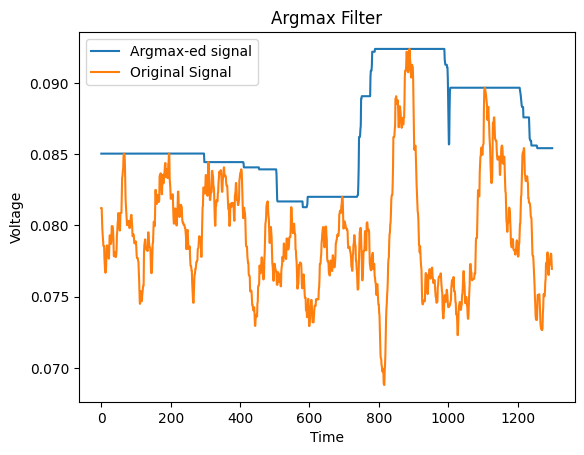

In [37]:
ws = 200
arr = pipeline.argmax_filter(signal, ws)

plt.title("Argmax Filter")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.plot(signal[arr], label='Argmax-ed signal')
plt.plot(signal[ws//2:-ws//2], label='Original Signal')
plt.legend()
plt.show()